In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np


%pylab inline

import os


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [26]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [27]:

df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [28]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [29]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY
as an example I am splitting data by gender and looking at age or riders:

H0: there is no statistical difference in the age distribution of male and female riders $$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [31]:

#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [35]:

#dropping some data I no longer need
#... your code here...
df.drop(['tripduration','start station id','start station name','start station latitude','start station longitude','end station id','end station name','end station name','end station name','end station latitude','end station longitude','bikeid'], axis=1, inplace = True)

ValueError: labels ['tripduration' 'start station id' 'start station name'
 'start station latitude' 'start station longitude' 'end station id'
 'end station name' 'end station name' 'end station name'
 'end station latitude' 'end station longitude' 'bikeid'] not contained in axis

In [36]:

df.drop(['usertype','date','starttime','stoptime'], axis=1, inplace = True)

In [37]:
df = df[df['gender']>0]
df.head()

,birth year,gender,ageM,ageF
0,1960.0,2,NaN,55.0
1,1963.0,1,52.0,NaN
2,1974.0,1,41.0,NaN
3,1969.0,1,46.0,NaN
4,1977.0,1,38.0,NaN


In [38]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,birth year,gender,ageM,ageF
count,279857.000000,279857.000000,227764.000000,52093.000000
mean,1974.946787,1.186141,40.305272,38.951145
std,11.572074,0.389222,11.595240,11.405112
min,1899.000000,1.000000,16.000000,17.000000
25%,1967.000000,1.000000,NaN,NaN
50%,1977.000000,1.000000,NaN,NaN
75%,1984.000000,1.000000,NaN,NaN
max,1999.000000,2.000000,116.000000,89.000000


In [39]:
# dropping NaN values
df['ageM'].dropna(axis='index',how='any',inplace=True)
df['ageF'].dropna(axis='index',how='any',inplace=True)
df['birth year'].dropna(axis='index',how='any',inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)



lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio.

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

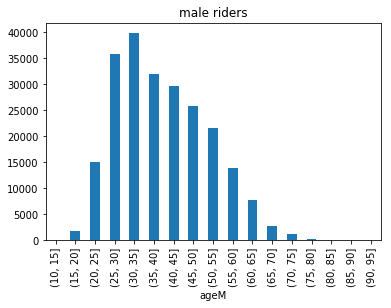

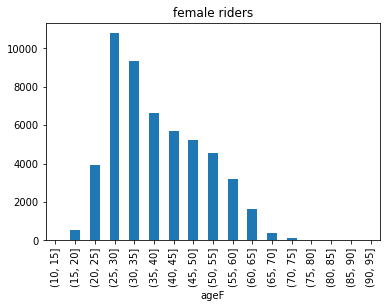

In [42]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

Figure 1: histogrammed distribution of riders' ages by gender here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like. Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


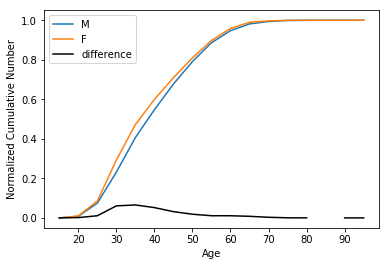

In [43]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure 2: the cumulative distribution of CitiBike riders' ages by gender ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.

Notice that there may be NaN values you are gonna have to deal with! You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [44]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow


# KS tests to compare 2 samples
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [46]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
#print (ks)

# FILL IN THE CELL BELOW!

Null hypothesis: the distribution of riders'a age among male riders is the same as the distribution of riders'a age among female riders. $Significance level = 0.05$¶ In the KS test, the value D is converges to 0, it is the supremum of the set of distances. As p = 0.5 and D is not small, we can reject the null hypotheses.

he scipy.stats KS test already tells me the significance and the p-value.

The next few cells are here just to show you how you would obtain the same result by hand, but they are not required.

Remember: the Null hypothesis is rejected if

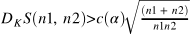$D_KS(n1,n2) &gt; c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!!

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [48]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

FileNotFoundError: [Errno 2] No such file or directory: '../plotsforclasses/ks2sample_table.png'

In [49]:
df_2 = df[df.index%200 == 0]
ks = scipy.stats.ks_2samp(df_2.ageM, df_2.ageF)
print(ks)

Ks_2sampResult(statistic=0.64680545585068194, pvalue=6.596663189885399e-256)


The KS test result of sample is close to the original one. The p-value is small, so we can reject the null hypothesis.

# Now retest using a test for correlation.
That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring: choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

    .. versionadded:: 1.7.0

Parameters ...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's test for correlation
notice that the Pearson's is a pairwise test: the samples need to be a. the same size b. sorted! (how??)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

Null Hypothesis: amount of male riders in different age group is not related to amount of female riders in different age group, $sig = 0.05$.

In [ ]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

In [50]:
df_2.head()
#df_2.drop(['starttime','stoptime','usertype','date'], axis=1, inplace = True)

,birth year,gender,ageM,ageF
0,1960.0,2,NaN,55.0
200,1965.0,1,50.0,NaN
400,1989.0,1,26.0,NaN
600,1957.0,1,58.0,NaN
1000,1984.0,1,31.0,NaN


In [51]:
male_data = df_2[df_2['gender'] == 1]
female_data = df_2[df_2['gender'] == 2]
print(len(male_data),len(female_data))

1147 246


In [52]:
male_data = male_data.sample(n=len(female_data))

bins = np.arange(10, 99, 5)

csM=male_data.ageM.groupby(pd.cut(male_data.ageM, bins)).agg([count_nonzero]).cumsum()

csF=female_data.ageF.groupby(pd.cut(female_data.ageF, bins)).agg([count_nonzero]).cumsum()

print(csM['count_nonzero'])

ageM
(10, 15]      0.0
(15, 20]      2.0
(20, 25]     24.0
(25, 30]     59.0
(30, 35]    101.0
(35, 40]    135.0
(40, 45]    157.0
(45, 50]    186.0
(50, 55]    210.0
(55, 60]    231.0
(60, 65]    239.0
(65, 70]    244.0
(70, 75]    245.0
(75, 80]    246.0
(80, 85]    246.0
(85, 90]    246.0
(90, 95]    246.0
Name: count_nonzero, dtype: float64


In [53]:
scipy.stats.pearsonr(csM['count_nonzero'],csF['count_nonzero'])

(0.99788347428343105, 3.1909944569532518e-19)

The result of pearson's test is $Pearson’s-correlation-coefficient = 0.998$, and $p-value= 0.05$, so we can reject the null hypothesis.

# Spearman's test for correlation
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

Null Hypothesis: amount of male riders in different age group is not related to amount of female riders in different age group, $sig = 0.05$.
please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

In [54]:
scipy.stats.spearmanr(csM['count_nonzero'],csF['count_nonzero'], axis=0, nan_policy='raise')

SpearmanrResult(correlation=0.98436915345461362, pvalue=9.9937012165887421e-13)

The result of Spearman's test is $correlation = 1.0$, and $p-value=0.0$ which means that the amount of male riders in different age group is highly related to amount of female riders in different age group.In this case, We can reject the null hypothesis.¶

#  Task 2: Trip duration of bikers that ride during the day vs night

In [3]:
datestring = '201602'
getCitiBikeCSV(datestring)

file in place, you can continue


# I used 201602 Citibike Data

In [4]:
df_dn = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_dn.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


## I define the daytime as 7:00am to 7:00pm and night time as 7:00pm to next day 7:00am. I use daytime to define the trip belongs to day time or night time.
## H0: there is no statistical difference in the trip duration of bikers that ride during the day vs night
Significance level is 0.05

In [5]:
# df is the dataframe where the content of the csv file is stored
df_dn['date'] = pd.to_datetime(df_dn['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df_dn.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,2016-02-01 00:00:08
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,2016-02-01 00:00:56
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,2016-02-01 00:01:00
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,2016-02-01 00:01:00
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,2016-02-01 00:01:41


In [6]:
df_dn.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [7]:

df_dn.drop(['stoptime','start station id','start station name','start station latitude','start station longitude','end station id','end station name','end station name','end station name','end station latitude','end station longitude','bikeid'], axis=1, inplace = True)
df_dn.head()

,tripduration,starttime,usertype,birth year,gender,date
0,461,2/1/2016 00:00:08,Subscriber,1966.0,1,2016-02-01 00:00:08
1,297,2/1/2016 00:00:56,Subscriber,1977.0,1,2016-02-01 00:00:56
2,280,2/1/2016 00:01:00,Subscriber,1987.0,1,2016-02-01 00:01:00
3,662,2/1/2016 00:01:00,Subscriber,1983.0,2,2016-02-01 00:01:00
4,355,2/1/2016 00:01:41,Subscriber,1978.0,1,2016-02-01 00:01:41


In [9]:
df_dn['hour'] = df_dn['date'].dt.hour
df_dn.tail()

,tripduration,starttime,usertype,birth year,gender,date,hour
560869,1013,2/29/2016 23:59:13,Subscriber,1962.0,1,2016-02-29 23:59:13,23
560870,1382,2/29/2016 23:59:18,Subscriber,1976.0,1,2016-02-29 23:59:18,23
560871,524,2/29/2016 23:59:20,Subscriber,1973.0,2,2016-02-29 23:59:20,23
560872,1120,2/29/2016 23:59:28,Subscriber,1966.0,1,2016-02-29 23:59:28,23
560873,301,2/29/2016 23:59:55,Subscriber,1984.0,1,2016-02-29 23:59:55,23


In [10]:
df_dn['tripduration'].dropna(inplace= True)
df_dn['day_duration'] = df_dn['tripduration'][(df_dn['hour']>=7) & (df_dn['hour']<19)]
df_dn['night_duration'] = df_dn['tripduration'][(df_dn['hour']>=19) | (df_dn['hour']<7)]

In [11]:
df_dn.tail()

,tripduration,starttime,usertype,birth year,gender,date,hour,day_duration,night_duration
560869,1013,2/29/2016 23:59:13,Subscriber,1962.0,1,2016-02-29 23:59:13,23,NaN,1013.0
560870,1382,2/29/2016 23:59:18,Subscriber,1976.0,1,2016-02-29 23:59:18,23,NaN,1382.0
560871,524,2/29/2016 23:59:20,Subscriber,1973.0,2,2016-02-29 23:59:20,23,NaN,524.0
560872,1120,2/29/2016 23:59:28,Subscriber,1966.0,1,2016-02-29 23:59:28,23,NaN,1120.0
560873,301,2/29/2016 23:59:55,Subscriber,1984.0,1,2016-02-29 23:59:55,23,NaN,301.0


In [12]:
df_dn = df_dn[df_dn['tripduration'] < 3600]

In [13]:
print(df_dn['tripduration'].max(),df_dn['tripduration'].min())

3598 61


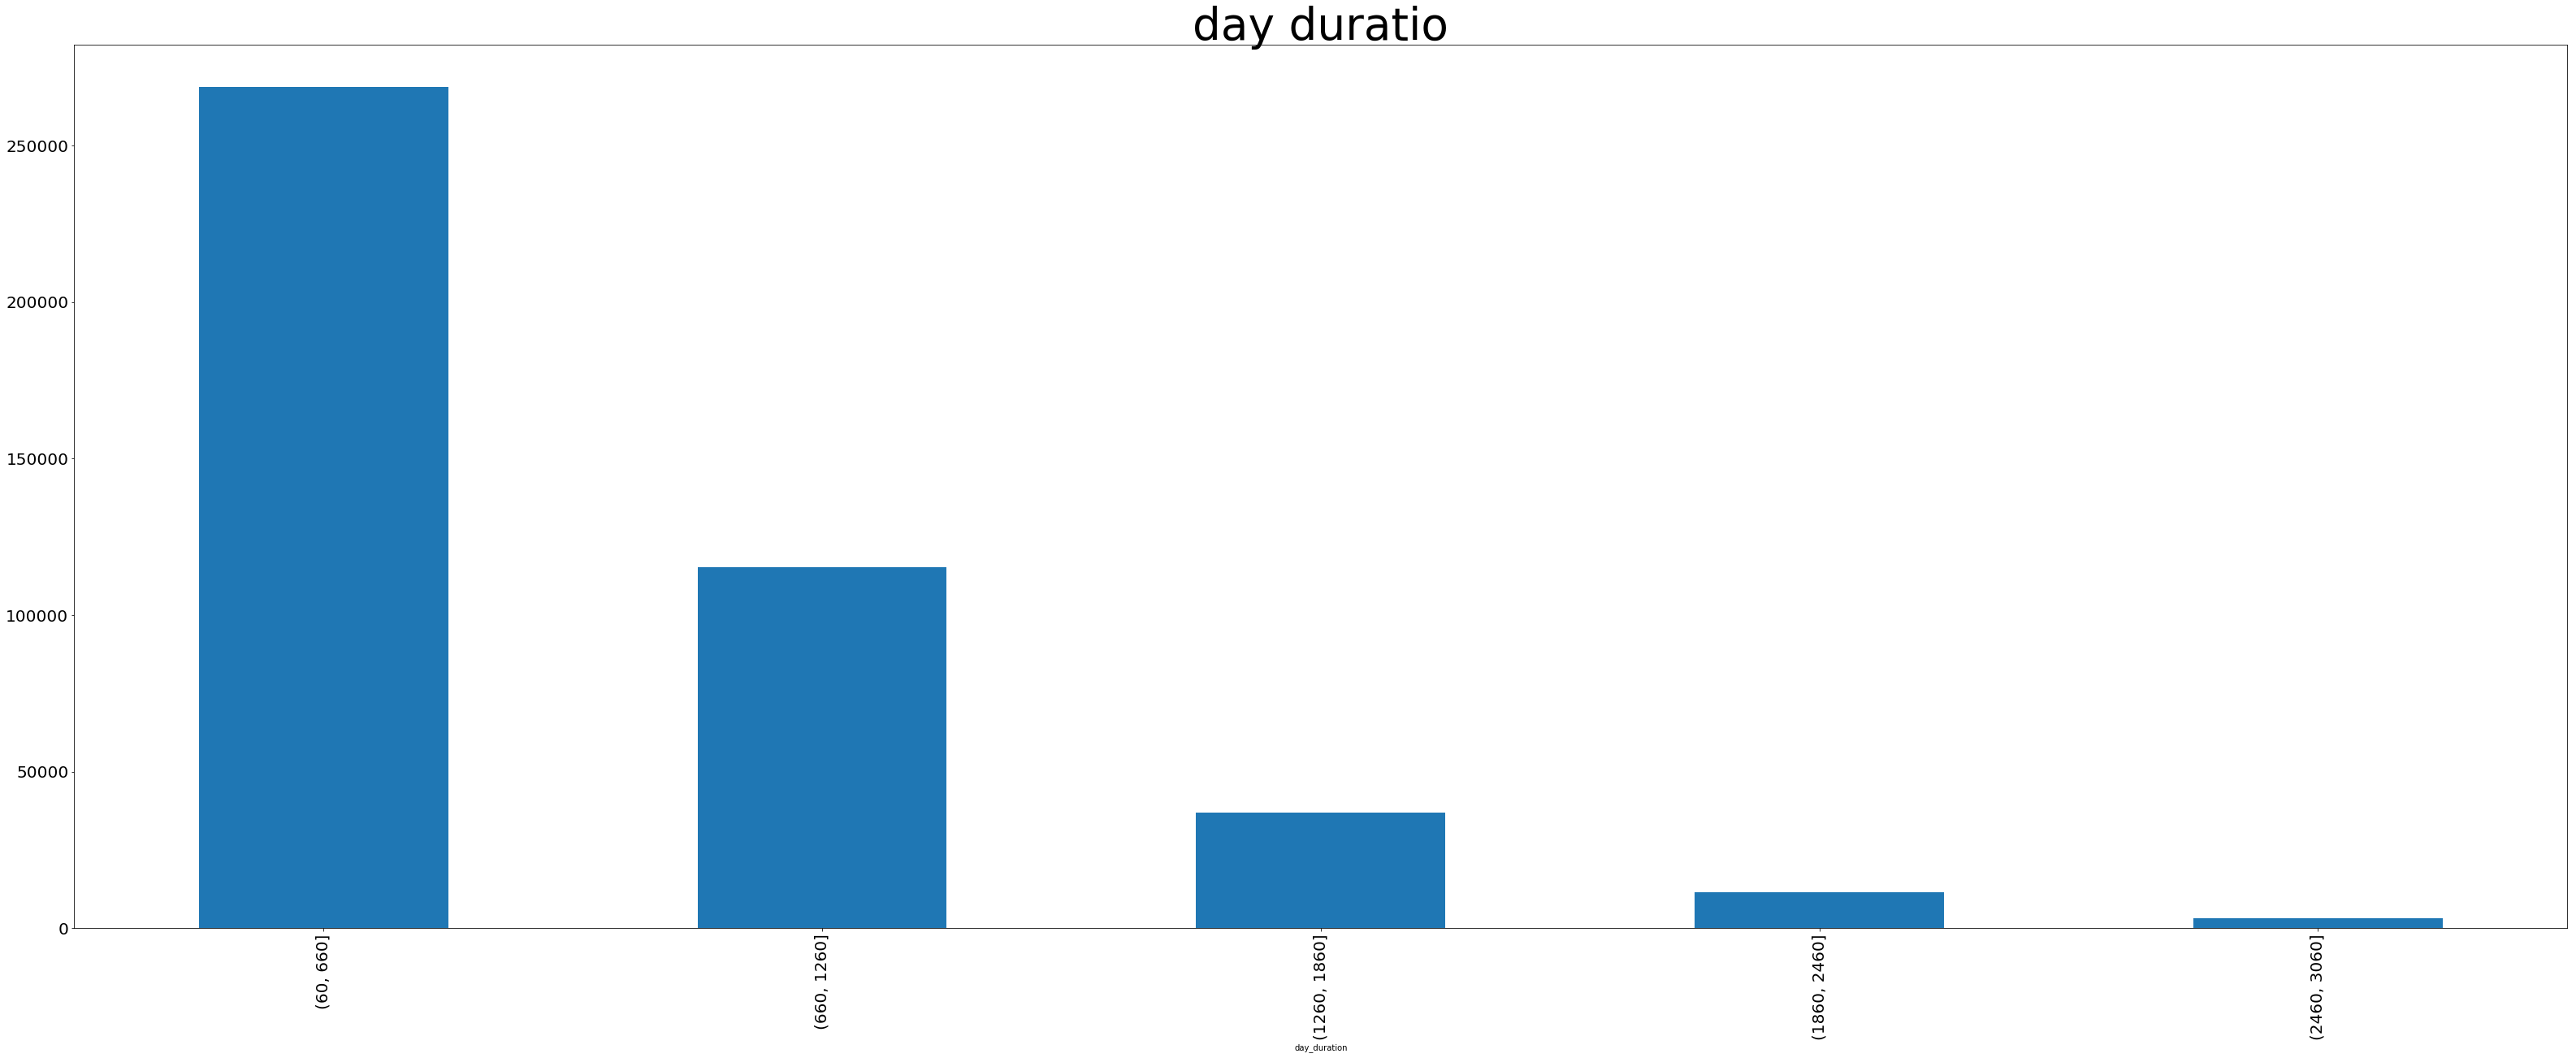

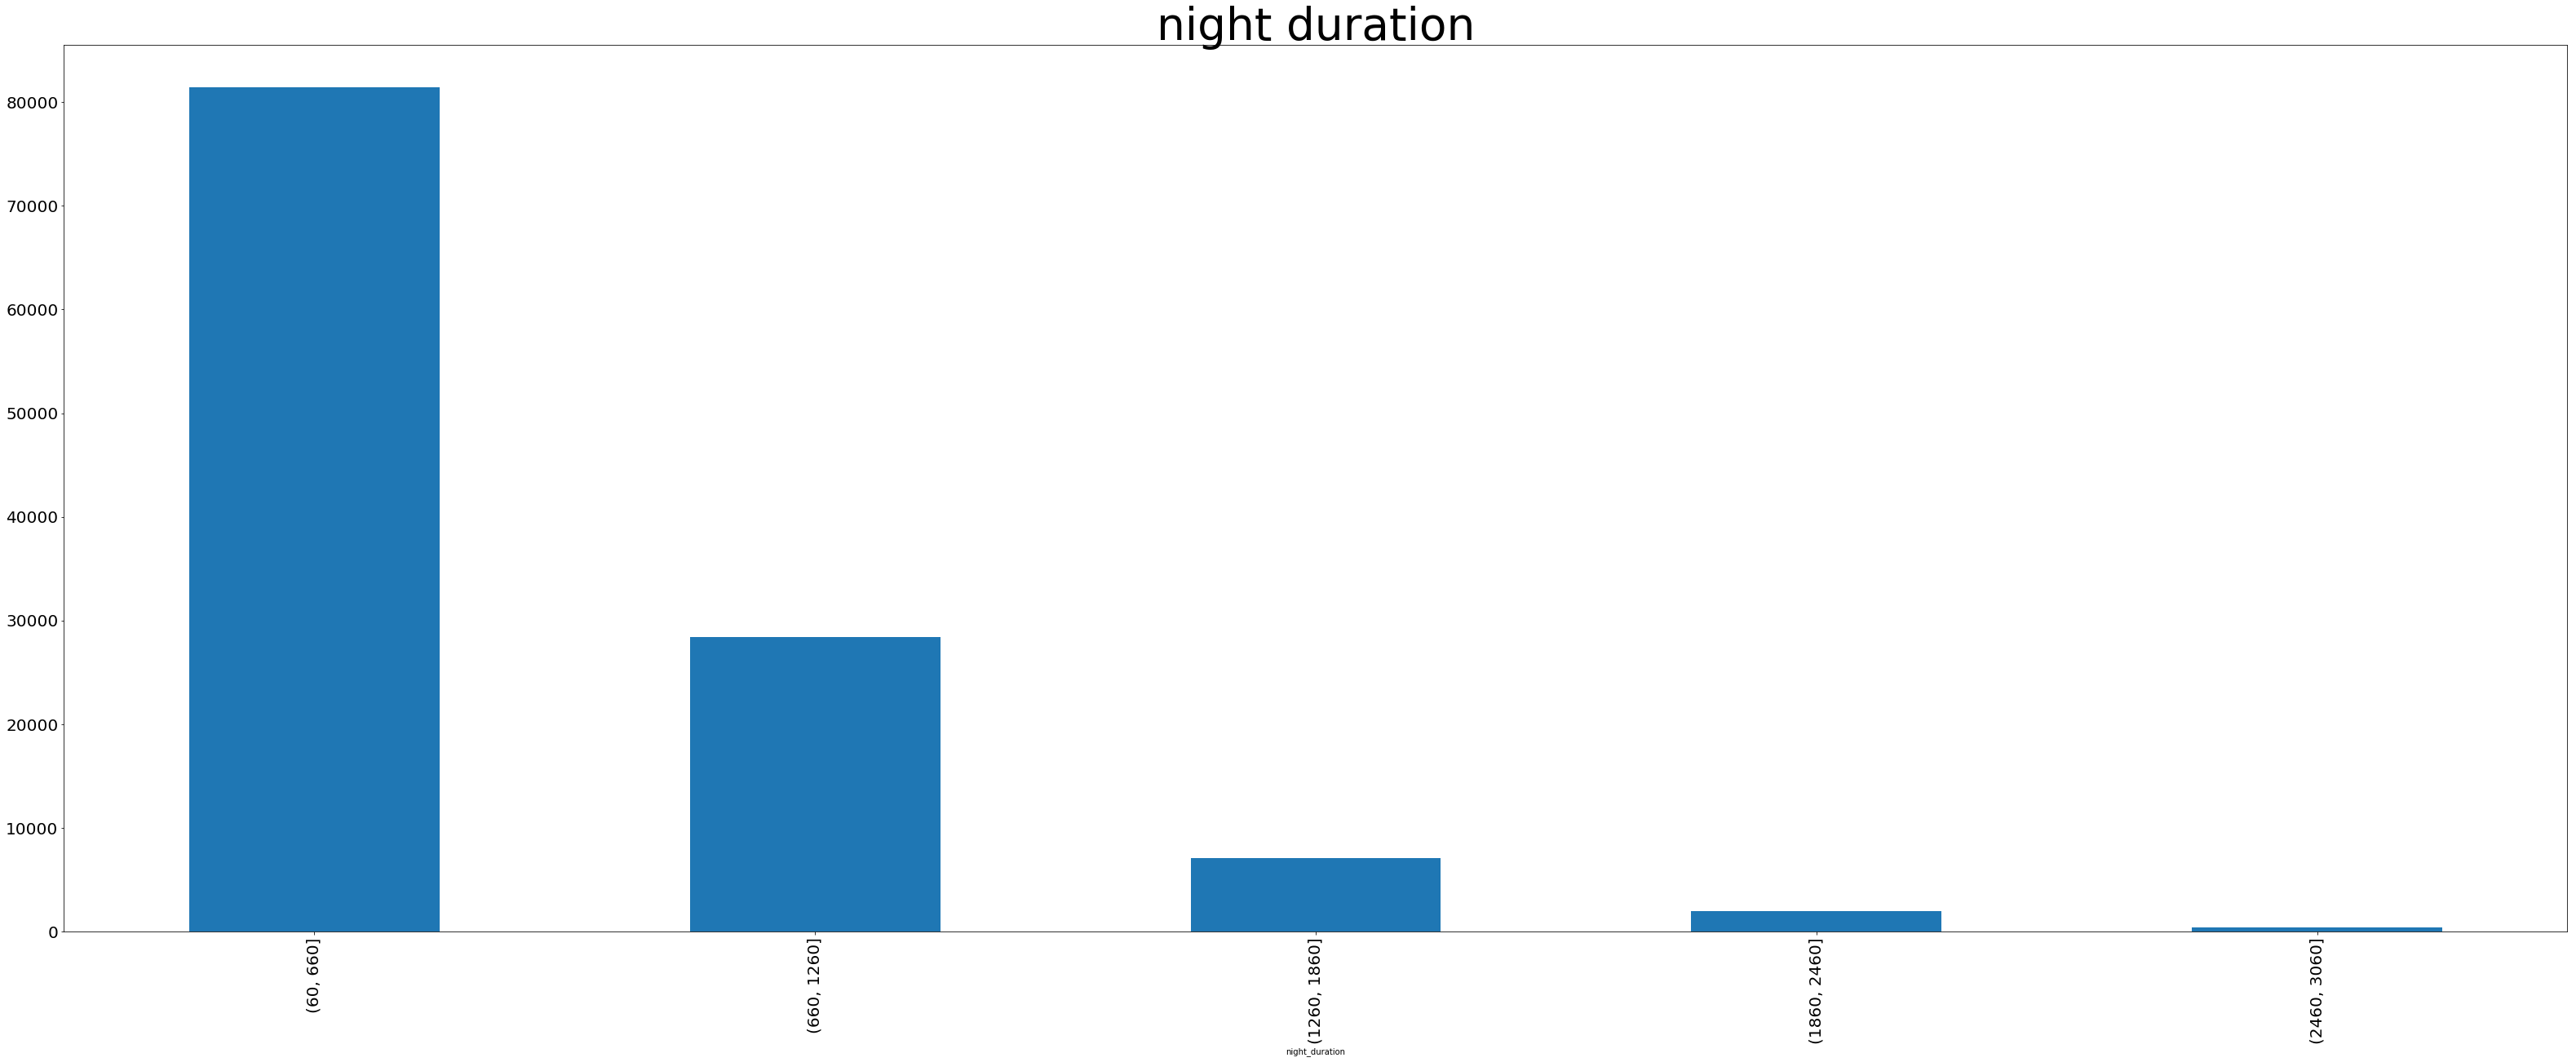

In [15]:
bins = np.arange(60, 3600, 600)
day_duration = df_dn.day_duration.groupby(pd.cut(df_dn.day_duration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, figsize=(55,20), fontsize = 20)
day_duration.set_title("day duratio", fontsize = 55)
night_duration = df_dn.night_duration.groupby(pd.cut(df_dn.night_duration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False, figsize=(55,20), fontsize = 20)
night_duration.set_title("night duration", fontsize = 55);

              count_nonzero
day_duration               
(60, 120]          0.005537
(120, 180]         0.018715
(180, 240]         0.034092
(240, 300]         0.045840
(300, 360]         0.054354
(360, 420]         0.062387
(420, 480]         0.066495
(480, 540]         0.069839
(540, 600]         0.067702
(600, 660]         0.066623
(660, 720]         0.066091
(720, 780]         0.063972
(780, 840]         0.060948
(840, 900]         0.056798
(900, 960]         0.053452
(960, 1020]        0.050979
(1020, 1080]       0.048270
(1080, 1140]       0.045847
(1140, 1200]       0.043162
(1200, 1260]       0.040357
(1260, 1320]       0.036792
(1320, 1380]       0.034343
(1380, 1440]       0.031691
(1440, 1500]       0.029260
(1500, 1560]       0.026472
(1560, 1620]       0.024191
(1620, 1680]       0.021846
(1680, 1740]       0.019575
(1740, 1800]       0.017116
(1800, 1860]       0.015557
(1860, 1920]       0.014321
(1920, 1980]       0.012638
(1980, 2040]       0.011522
(2040, 2100]       0

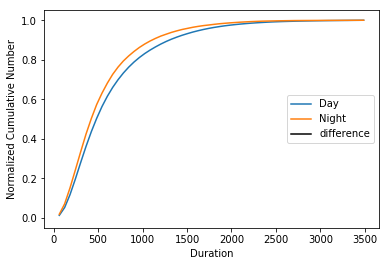

In [16]:
bins = np.arange(60, 3600, 60)
csD=df_dn.day_duration.groupby(pd.cut(df_dn.day_duration, bins)).agg([count_nonzero]).cumsum()

csN=df_dn.night_duration.groupby(pd.cut(df_dn.night_duration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',label = "difference")
pl.xlabel("Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# KS Test

## H0: there is no statistical difference in the trip duration of bikers that ride during the day vs night
Significance level is 0.05

In [21]:
import scipy.stats
import requests

In [25]:
df_dn.drop(['starttime','tripduration','usertype','birth year','gender','date','hour'], axis=1, inplace = True)
day_data = df_dn.dropna(subset=['day_duration'])
night_data = df_dn.dropna(subset=['night_duration'])

ValueError: labels ['starttime' 'tripduration' 'usertype' 'birth year' 'gender' 'date' 'hour'] not contained in axis

In [23]:
ks = scipy.stats.ks_2samp(df_dn.day_duration, df_dn.night_duration)
print(ks)

Ks_2sampResult(statistic=0.57061868641478242, pvalue=0.0)


The result of KS test is $KS-correlation-coefficient = 0.5706$, and $p-value = 0.05$, so we can reject the null hypothesis.

# Pearson's test

## H0: There is no relationship between day trip duration and night trip duration
Significance level is 0.05

In [24]:
scipy.stats.pearsonr(csD['count_nonzero'],csN['count_nonzero'])

(0.99696171374625531, 8.9359169298496385e-64)


The result of pearson's test is that $Pearson’s-correlation-coefficient = 0.998$, and $p-value = 0.05$, so  we can reject the null hypothesis.

# Spearman's test for correlation

# H0: There is no relationship between day trip duration and night trip duration

In [57]:
scipy.stats.spearmanr(csD['count_nonzero'],csN['count_nonzero'], axis=0, nan_policy='raise')

SpearmanrResult(correlation=1.0, pvalue=0.0)

The result of Spearman's test is $correlation = 1.0$, and $p-value=0.0$ which means that the amount of male riders in different age group is highly related to amount of female riders in different age group. We can reject the null hypothesis.¶

# Task3: age of bikers for trips originating in Manhattan and in Brooklyn. Use at least 2 months of citibike data (Extra Credit)

In [58]:
datestring = '201601'
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1
